<a href="https://colab.research.google.com/github/Arpita2233/gpuvccpu/blob/main/cpuvcgpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot  as plt

In [ ]:
tf.config.experimental.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
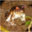

In [ ]:
x_train[0]

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
def plotsample(index):
  plt.figure(figsize=(10,2))
  plt.imshow(x_train[index])

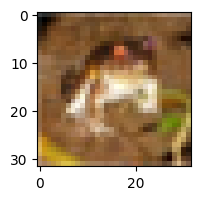

In [ ]:
plotsample(0)

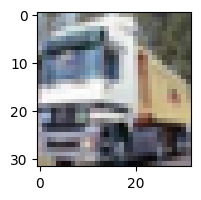

In [ ]:
plotsample(1)

In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
).astype("float32")


In [ ]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
).astype("float32")


In [ ]:
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3044 - loss: 1.9222
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4205 - loss: 1.6438
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4494 - loss: 1.5525
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4794 - loss: 1.4824
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4938 - loss: 1.4430
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5076 - loss: 1.3968
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5234 - loss: 1.3551
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5375 - loss: 1.3155
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5470 - loss: 1.2880
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5610 - loss: 1.2528
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5705 - loss: 1.2244
Epoch 12/50
1563/1563 ━━━━━━━

In [ ]:
model.predict(x_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[7.6955402e-01, 5.2167612e-01, 7.9702950e-01, ..., 5.4280357e-05,
        6.2204766e-01, 8.4790695e-01],
       [9.0260357e-01, 9.9771738e-01, 1.4254417e-01, ..., 2.4314817e-02,
        9.9999249e-01, 9.9970442e-01],
       [9.9808818e-01, 9.7778577e-01, 1.9489759e-01, ..., 6.4348042e-01,
        9.9861109e-01, 9.6457803e-01],
       ...,
       [8.3971697e-01, 9.3775953e-04, 9.9673814e-01, ..., 4.2583081e-01,
        1.4648198e-01, 2.5709367e-01],
       [9.7066021e-01, 1.4831738e-01, 9.2722219e-01, ..., 7.5094439e-02,
        2.5790235e-02, 1.3581985e-01],
       [5.6330919e-01, 1.1511772e-01, 6.7986822e-01, ..., 9.8173302e-01,
        1.3859329e-01, 2.8193817e-01]], dtype=float32)

In [ ]:
np.argmax(model.predict(x_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(3)

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5619 - loss: 1.6158


[1.625936508178711, 0.5551000237464905]

In [ ]:
def getmodel():
  model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])
  model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model


In [ ]:
%%timeit -n1 -r1
with tf.device('CPU:0'):
  cpu_model=getmodel()
  cpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.3045 - loss: 1.9301
1min 50s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('GPU:0'):
  gpu_model=getmodel()
  gpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3084 - loss: 1.9344
10.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
